In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import binom

In [8]:
def clopper_pearson(k,n,alpha=0.32):
    """
    http://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval
    alpha confidence intervals for a binomial distribution of k expected successes on n trials
    Clopper Pearson intervals are a conservative estimate.
    Can also do this through statsmodels.stats.proportion.proportion_confint
    """
    lo = beta.ppf(alpha/2, k, n-k+1)
    hi = beta.ppf(1 - alpha/2, k+1, n-k)
    return lo, hi

In [22]:
# Binomial trials
p  = 0.98
N  = 50
mu = N*p  # no. of expected successes
q  = 1-p
s  = math.sqrt(N*p*q)

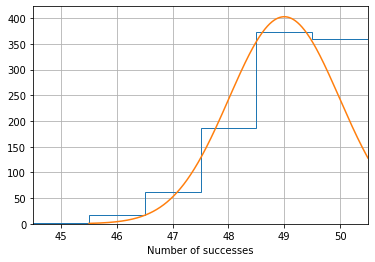

In [23]:
# Pick Npicks according to binomial and plot the results in +/- 4sigma
# Superimpose a Gaussian
np.random.seed(12345)
Npicks = 1000
k      = np.random.binomial(N, p, Npicks)
bmin   = max(0., int(mu-4*s))
bmax   = min(N,  int(mu+4*s))
bins   = np.linspace(bmin, bmax+1, bmax-bmin+2) - 0.5
x      = np.linspace(bmin,bmax,1000)+0.5
ax     = plt.subplot(111)
ax.hist(k, bins, histtype='step')
ax.plot(x, Npicks*norm.pdf(x, scale=s, loc=mu))
ax.set_xlim((bins[0], bins[-1]))
ax.grid()
ax.set_xlabel("Number of successes")
_ = ax.set_ylim(bottom=0)

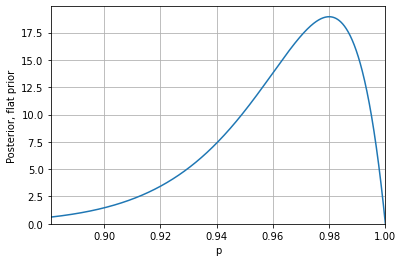

In [24]:
# For a given number of successes out of N plot the 
# Bayesian posterior (flat prior)
N    = 50
Good = 49 #  Number of successes
Bad  = N - Good

p,q = Good/N, Bad/N
s   = math.sqrt(p*q/N)
x   = np.linspace(max(0,p-5*s), min(1,p+5*s), 1000)
rv  = beta(1+Good, 1+Bad)
ax  = plt.subplot(111)
ax.plot(x, rv.pdf(x))
ax.set_xlim((x[0], x[-1]))
ax.grid()
ax.set_xlabel("p")
ax.set_ylabel("Posterior, flat prior")
_ = ax.set_ylim(bottom=0)



In [25]:
# Calculate 1 and 2 sigma interval, compare with Clopper Pearson
for alpha in (0.6827, 0.9545):
    up  = rv.ppf(1- (1-alpha)/2)
    low = rv.ppf((1-alpha)/2)
    print("%4.2f%% Bayesian interval: %4.2f -- %4.2f" % (100*alpha,low,up))
    low,up = clopper_pearson(Good,N,1-alpha)
    print("%4.2f%% Clopper-Pearson interval: %4.2f -- %4.2f" % (100*alpha,low,up))

68.27% Bayesian interval: 0.94 -- 0.99
68.27% Clopper-Pearson interval: 0.94 -- 1.00
95.45% Bayesian interval: 0.89 -- 1.00
95.45% Clopper-Pearson interval: 0.89 -- 1.00
